# Fuel Efficiency Deep Learning Model
## Preprocessing

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

data = pd.read_csv('data.csv')

X = data.copy()
y = X.pop('FE')

preprocessing = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse_output=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessing.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

input_shape = [X_train.shape[1]]

## Neural Network Setup

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.layers import BatchNormalization

model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1),
])

/home/pi/Code/fuel-efficiency/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Early Stopping

In [3]:
early_stopping = callbacks.EarlyStopping(
    patience=5,
    min_delta=0.01,
    restore_best_weights=True
)

### Compile Model

In [4]:
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['mae']
)

## Fit & Train Model

In [5]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=75,
    callbacks=[early_stopping]
)

Epoch 1/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - loss: 34.6545 - mae: 34.6545 - val_loss: 34.5277 - val_mae: 34.5277
Epoch 2/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 34.3162 - mae: 34.3162 - val_loss: 34.4352 - val_mae: 34.4352
Epoch 3/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 34.3733 - mae: 34.3733 - val_loss: 34.3221 - val_mae: 34.3221
Epoch 4/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 34.6242 - mae: 34.6242 - val_loss: 34.1882 - val_mae: 34.1882
Epoch 5/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 34.1823 - mae: 34.1823 - val_loss: 34.0314 - val_mae: 34.0314
Epoch 6/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 33.8576 - mae: 33.8576 - val_loss: 33.8468 - val_mae: 33.8468
Epoch 7/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 33.9835 - mae: 33.9835 - val_loss: 33.6387 - val_mae: 33.6387
Epoch 8/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 33.3965 - mae: 33.3965 - val_loss: 33.4029 - val_mae: 33.4029
Epoch 9/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/ste

## Loss Comparison

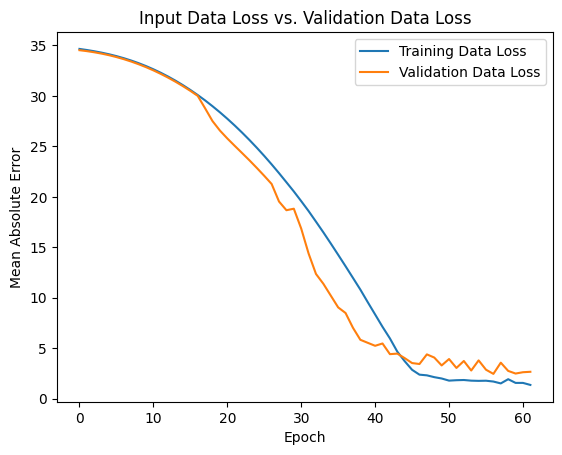

In [6]:
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
plt.title("Input Data Loss vs. Validation Data Loss")
plt.plot(history_df['loss'], label='Training Data Loss')
plt.plot(history_df['val_loss'], label='Validation Data Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [7]:
history_df.iloc[-1]

loss        1.364268
mae         1.364268
val_loss    2.665482
val_mae     2.665482
Name: 61, dtype: float64

In [8]:
data["FE"].describe()

count    1107.000000
mean       34.706489
std         7.498033
min        17.500000
25%        29.085350
50%        34.514800
75%        39.200000
max        69.640400
Name: FE, dtype: float64